# MoMA's Acquisition Practices: Progressive or Conservative?
There are a few proxies for assessing an acquisition program that tends towards progressive or conservative. For a progressive program, we might expect to see an emphasis on newer works by younger and more diverse artists. For a more conservative program, conversely, we'd exepct older works by older (or dead) and less diverse artists.

Let's find out, with a narrow focus on the Department of Painting & Sculpture. *When I refer to MoMA moving forward, I'm actually looking specifically at this one department.*

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv('../data/moma/Artworks_multiartist_clean.csv')
df.head()

,Title,Artist,ConstituentID,ArtistBio,Nationality,BeginDate,EndDate,Gender,Date,Medium,...,year_acquired,date_stripped,begun_year,completed_year,birth_year,death_year,artwork_age,living,artist_age,years_posthumous
0,"Ferdinandsbrücke Project, Vienna, Austria (Ele...",Otto Wagner,6210,"(Austrian, 1841–1918)",(Austrian),(1841),(1918),(Male),1896,Ink and cut-and-pasted painted pages on paper,...,1996.0,1896,1896.0,1896.0,1841.0,1918.0,100.0,0.0,NaN,78.0
1,"City of Music, National Superior Conservatory ...",Christian de Portzamparc,7470,"(French, born 1944)",(French),(1944),(0),(Male),1987,Paint and colored pencil on print,...,1995.0,1987,1987.0,1987.0,1944.0,0.0,8.0,1.0,51.0,NaN
2,"Villa near Vienna Project, Outside Vienna, Aus...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, pen, color pencil, ink, and gouache ...",...,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0.0,NaN,40.0
3,"The Manhattan Transcripts Project, New York, N...",Bernard Tschumi,7056,"(French and Swiss, born Switzerland 1944)",(),(1944),(0),(Male),1980,Photographic reproduction with colored synthet...,...,1995.0,1980,1980.0,1980.0,1944.0,0.0,15.0,1.0,51.0,NaN
4,"Villa, project, outside Vienna, Austria, Exter...",Emil Hoppe,7605,"(Austrian, 1876–1957)",(Austrian),(1876),(1957),(Male),1903,"Graphite, color pencil, ink, and gouache on tr...",...,1997.0,1903,1903.0,1903.0,1876.0,1957.0,94.0,0.0,NaN,40.0


In [3]:
# Establish Palette 1
palette1_dict = {
    'red': '#FE5F55',
    'blue': '#208AAE',
    'green': '#18A999',
    'yellow': '#F0F3BD',
    'darkblue': '#00072D',
    'purple': '#9368B7',
    'orange': '#F2B880',
    'pink': '#EFC3E6',
    'darkred': '#C44536',
    'darkgreen': '#4B644A',
    'gray': '#DDDDDD',
    'darkgray': '#AAAAAA'
}
palette1_colors = [c for c in palette1_dict.values()]
palette1 = sns.color_palette(palette1_colors)
palette1

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6),
 (0.9411764705882353, 0.9529411764705882, 0.7411764705882353),
 (0.0, 0.027450980392156862, 0.17647058823529413),
 (0.5764705882352941, 0.40784313725490196, 0.7176470588235294),
 (0.9490196078431372, 0.7215686274509804, 0.5019607843137255),
 (0.9372549019607843, 0.7647058823529411, 0.9019607843137255),
 (0.7686274509803922, 0.27058823529411763, 0.21176470588235294),
 (0.29411764705882354, 0.39215686274509803, 0.2901960784313726),
 (0.8666666666666667, 0.8666666666666667, 0.8666666666666667),
 (0.6666666666666666, 0.6666666666666666, 0.6666666666666666)]

In [4]:
# Establish Palette 2
palette2_dict = {
    'orange':'#F18F01',
    'blue':'#2E86AB',
    'purple':'#A23B72',
    'black':'#02020A'
}
palette2_colors = [c for c in palette2_dict.values()]
palette2 = sns.color_palette(palette2_colors)
palette2

[(0.9450980392156862, 0.5607843137254902, 0.00392156862745098),
 (0.1803921568627451, 0.5254901960784314, 0.6705882352941176),
 (0.6352941176470588, 0.23137254901960785, 0.4470588235294118),
 (0.00784313725490196, 0.00784313725490196, 0.0392156862745098)]

In [5]:
# Set Theme
sns.set_theme(
    context='notebook', 
    style='white', 
    palette=palette1,
    rc={'axes.linewidth':1}
)

In [6]:
# Count artist genders for each work
import re

df['gender_male'] = df['Gender'].str.count('\(male\)', flags=re.I)
df['gender_female'] = df['Gender'].str.count('\(female\)', flags=re.I)
df['gender_nonbinary'] = df['Gender'].str.count('\(non-binary\)', flags=re.I)

In [7]:
# Filter dataset for Dept of Painting and Sculpture
ps = df[df['Department'] == 'Painting & Sculpture'].copy()

print("MoMA's Dept. of Painting and Sculpture contains {:,} works".format(len(ps)))

MoMA's Dept. of Painting and Sculpture contains 3,981 works


# Does MoMA focus on acquiring work by living artists?
Yes!

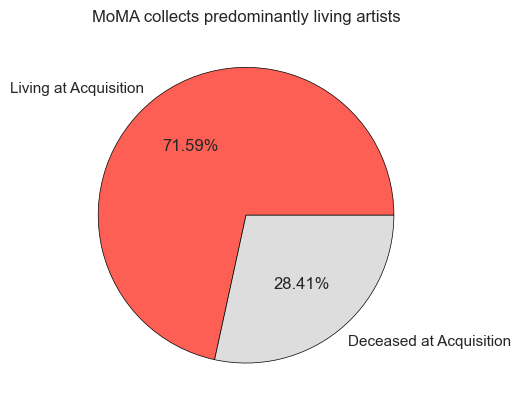

In [8]:
plt.pie(
    ps['living'].value_counts(),
    #autopct='%.2f', 
    autopct=lambda s: '{:.2f}%'.format(s),
    colors=[palette1_dict['red'], palette1_dict['gray']], 
    labels=['Living at Acquisition', 'Deceased at Acquisition'],
    wedgeprops=dict(edgecolor='black', linewidth=.5)
)

plt.title('MoMA collects predominantly living artists');

# But has this focus changed over time?
Also yes.

To compute how this changes over time, I am creating two line charts:
- The first shows the annual ratio of acquisitions by living artists to total acquisitions. In a year where there were 8 acquisitions, 6 of which by living artists, this number would be .75.
- The second shows a 10-year moving average to smooth out the noise. Because some the number of acquisitions the department makes may vary significantly from one year to the next, I wanted to be sure not to simply take the 10-year rolling mean of the above statistic. In a scenario where the department acquired 1 work per year (always by a living artist) for 9 years, and then in the 10th year acquired 100 works all by non-living artists, the naive calculation would return .9 (9 years of 100% living artists and 1 year of 0% living). Instead, I needed to take the 10-year cumulative sum of acquisitions by living artists divided by the 10-year cumulative sum of total acquisitions.

In [9]:
living_vs_total = pd.concat([
    ps.groupby('year_acquired')['living'].agg(['sum', 'count', 'mean']),
    ps.groupby('year_acquired')['living'].agg(['sum', 'count']).rolling(10).sum()
], axis=1, keys=['Annual', '10-Year MA'])

living_vs_total

Annual                 10-Year MA       
                 sum count      mean        sum  count
year_acquired                                         
1930.0           4.0     4  1.000000        NaN    NaN
1931.0           1.0     2  0.500000        NaN    NaN
1932.0           1.0     1  1.000000        NaN    NaN
1934.0           9.0    19  0.473684        NaN    NaN
1935.0          11.0    19  0.578947        NaN    NaN
...              ...   ...       ...        ...    ...
2018.0          34.0    42  0.809524      483.0  678.0
2019.0          18.0    36  0.500000      472.0  682.0
2020.0          15.0    18  0.833333      357.0  565.0
2021.0          30.0    49  0.612245      330.0  524.0
2022.0          34.0    43  0.790698      333.0  521.0

[92 rows x 5 columns]

In [10]:
living_vs_total['10-Year MA', 'mean'] = living_vs_total['10-Year MA', 'sum'] / living_vs_total['10-Year MA', 'count']
living_vs_total

Annual                 10-Year MA                 
                 sum count      mean        sum  count      mean
year_acquired                                                   
1930.0           4.0     4  1.000000        NaN    NaN       NaN
1931.0           1.0     2  0.500000        NaN    NaN       NaN
1932.0           1.0     1  1.000000        NaN    NaN       NaN
1934.0           9.0    19  0.473684        NaN    NaN       NaN
1935.0          11.0    19  0.578947        NaN    NaN       NaN
...              ...   ...       ...        ...    ...       ...
2018.0          34.0    42  0.809524      483.0  678.0  0.712389
2019.0          18.0    36  0.500000      472.0  682.0  0.692082
2020.0          15.0    18  0.833333      357.0  565.0  0.631858
2021.0          30.0    49  0.612245      330.0  524.0  0.629771
2022.0          34.0    43  0.790698      333.0  521.0  0.639155

[92 rows x 6 columns]

In [11]:
living_vs_total['10-Year MA'].reset_index()

,year_acquired,sum,count,mean
0,1930.0,NaN,NaN,NaN
1,1931.0,NaN,NaN,NaN
2,1932.0,NaN,NaN,NaN
3,1934.0,NaN,NaN,NaN
4,1935.0,NaN,NaN,NaN
...,...,...,...,...
87,2018.0,483.0,678.0,0.712389
88,2019.0,472.0,682.0,0.692082
89,2020.0,357.0,565.0,0.631858
90,2021.0,330.0,524.0,0.629771


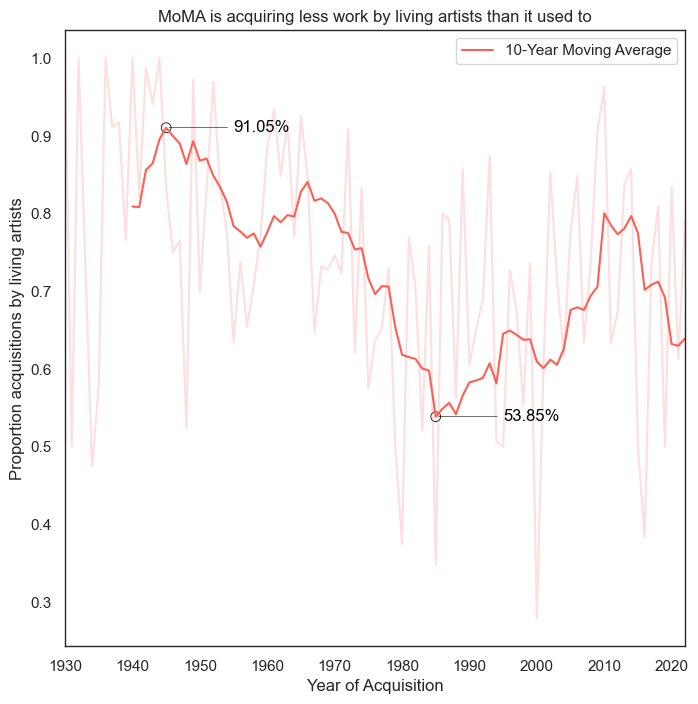

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot yearly ratio
sns.lineplot(
    data=living_vs_total['Annual'].reset_index(),
    y='mean',
    x='year_acquired',
    color=palette1_dict['red'],
    legend=None, 
    alpha=.2, 
    ax=ax
)


# Plot 10-year MA
sns.lineplot(
    data=living_vs_total['10-Year MA'].reset_index(),
    y='mean',
    x='year_acquired',
    hue=['10-Year Moving Average'] * len(living_vs_total),
    color=palette1_dict['red'],
    legend=True, 
    alpha=1,
    ax=ax
)


# Plot extreme points
extremes = pd.DataFrame(
    living_vs_total[('10-Year MA', 'mean')].dropna().sort_values().iloc[[0, -1]].reset_index()
)
extremes.columns = ['year', 'mean']

sns.scatterplot(
    data=extremes,
    y='mean',
    x='year',
    s=50,
    marker='o',
    edgecolor='black',
    facecolor='none',
    ax=ax
)


# Title and axis labels
ax.set_title('MoMA is acquiring less work by living artists than it used to')
ax.set_xlabel('Year of Acquisition')
ax.set_ylabel('Proportion acquisitions by living artists')
ax.tick_params(axis='both')
ax.set_xticks(range(1920, 2025, 10))
ax.set_xlim(1930, 2022)

# Annotations
high_year, high_val = extremes.iloc[0]
low_year, low_val = extremes.iloc[1]

ax.annotate(
    '{:.2f}%'.format(high_val * 100), xy=(high_year, high_val),
    xycoords='data', xytext=(high_year + 10, high_val), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:.2f}%'.format(low_val * 100), xy=(low_year, low_val),
    xycoords='data', xytext=(low_year + 10, low_val), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
);

While we can see a more recent trend in reprioritizing acquisitions by living artists from the 1980s through 2010, today work by living artists is making up a smaller proportion of the department's overall acquisitions (about 64%) than at its height in the 1940s. This reflects a tendency towards conservatism on the part of the museum as its focus on new work by living artist weakens.

# MoMA is Trending Conservative by Some Metrics
Not only is MoMA acquiring fewer works by living artists, but also:
- the average artwork age at the time of acquisition is increasing
- artists are increasingly older at the time of acquisition (when the artist is still living)
- more time has elapsed since an artist's death (for artists who are not)

All of these metrics are proxies for the museum's increasing emphasis on collecting older work by older artists with older and better-established legacies. All of which makes sense considering that there was no such thing as a museum for modern art when Alfred Barr, Jr. founded MoMA in 1929. The museum was, by definition, acquiring work of its present. However, what was once an imperative to historicize the present is now an imperative to preserve that history, at least in part.

In [13]:
over_time = (
    ps.groupby('year_acquired')[['years_posthumous', 'artwork_age', 'artist_age']].agg(['sum', 'count', 'mean'])
)
over_time

years_posthumous                  artwork_age                   \
                           sum count       mean         sum count       mean   
year_acquired                                                                  
1930.0                     0.0     0        NaN        50.0     4  12.500000   
1931.0                     1.0     1   1.000000         7.0     2   3.500000   
1932.0                     0.0     0        NaN         6.0     1   6.000000   
1934.0                   212.0    10  21.200000       376.0    18  20.888889   
1935.0                     6.0     8   0.750000       200.0    17  11.764706   
...                        ...   ...        ...         ...   ...        ...   
2018.0                   286.0     8  35.750000      1161.0    40  29.025000   
2019.0                   273.0    18  15.166667      1268.0    35  36.228571   
2020.0                    77.0     3  25.666667       173.0    18   9.611111   
2021.0                   443.0    19  23.315789      1355.0    49  27.653061   
2022.0                   303.0     9  33.666667      1144.0    43  26.604651   

              artist_age                   
                     sum count       mean  
year_acquired                              
1930.0             236.0     4  59.000000  
1931.0              51.0     1  51.000000  
1932.0              41.0     1  41.000000  
1934.0             442.0     9  49.111111  
1935.0             543.0    11  49.363636  
...                  ...   ...        ...  
2018.0            2182.0    34  64.176471  
2019.0            1192.0    18  66.222222  
2020.0             715.0    14  51.071429  
2021.0            1753.0    30  58.433333  
2022.0            1903.0    33  57.666667  

[92 rows x 9 columns]

In [14]:
over_time = over_time.xs('mean', level=1, axis=1).melt(ignore_index=False, var_name='metric', value_name='Annual mean')
over_time

,metric,Annual mean
year_acquired,,
1930.0,years_posthumous,NaN
1931.0,years_posthumous,1.000000
1932.0,years_posthumous,NaN
1934.0,years_posthumous,21.200000
1935.0,years_posthumous,0.750000
...,...,...
2018.0,artist_age,64.176471
2019.0,artist_age,66.222222
2020.0,artist_age,51.071429


In [15]:
over_time_rolling = (
    ps.groupby('year_acquired')[['years_posthumous', 'artwork_age', 'artist_age']].agg(['sum', 'count']).rolling(10).sum()
)

over_time_rolling

years_posthumous        artwork_age        artist_age       
                           sum  count         sum  count        sum  count
year_acquired                                                             
1930.0                     NaN    NaN         NaN    NaN        NaN    NaN
1931.0                     NaN    NaN         NaN    NaN        NaN    NaN
1932.0                     NaN    NaN         NaN    NaN        NaN    NaN
1934.0                     NaN    NaN         NaN    NaN        NaN    NaN
1935.0                     NaN    NaN         NaN    NaN        NaN    NaN
...                        ...    ...         ...    ...        ...    ...
2018.0                  3986.0  195.0     18800.0  670.0    28378.0  482.0
2019.0                  4135.0  210.0     19556.0  673.0    28048.0  471.0
2020.0                  4094.0  208.0     15724.0  558.0    20712.0  355.0
2021.0                  3776.0  194.0     14644.0  519.0    19355.0  329.0
2022.0                  3860.0  188.0     14942.0  516.0    19565.0  331.0

[92 rows x 6 columns]

In [16]:
years_posthumous_MA = (
    over_time_rolling.xs('years_posthumous', level=0, axis=1)['sum'] / 
    over_time_rolling.xs('years_posthumous', level=0, axis=1)['count']
)

artwork_age_MA = (
    over_time_rolling.xs('artwork_age', level=0, axis=1)['sum'] / 
    over_time_rolling.xs('artwork_age', level=0, axis=1)['count']
)

artist_age_MA = (
    over_time_rolling.xs('artist_age', level=0, axis=1)['sum'] / 
    over_time_rolling.xs('artist_age', level=0, axis=1)['count']
)

over_time_MA = pd.DataFrame({
    'years_posthumous_MA':years_posthumous_MA, 
    'artist_age_MA':artist_age_MA, 
    'artwork_age_MA':artwork_age_MA
}).melt(ignore_index=False, var_name='metric', value_name='Annual mean')

over_time_MA

,metric,Annual mean
year_acquired,,
1930.0,years_posthumous_MA,NaN
1931.0,years_posthumous_MA,NaN
1932.0,years_posthumous_MA,NaN
1934.0,years_posthumous_MA,NaN
1935.0,years_posthumous_MA,NaN
...,...,...
2018.0,artwork_age_MA,28.059701
2019.0,artwork_age_MA,29.057949
2020.0,artwork_age_MA,28.179211


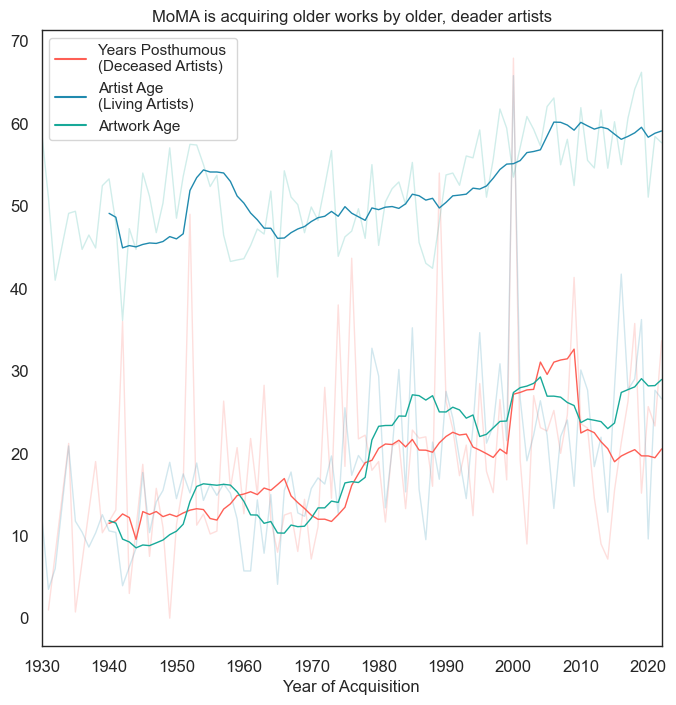

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=over_time.reset_index(),
    hue='metric',
    y='Annual mean',
    x='year_acquired',
    alpha=.2,
    lw=1,
    ax=ax, legend=False
)

sns.lineplot(
    data=over_time_MA.reset_index(),
    hue='metric',
    y='Annual mean',
    x='year_acquired',
    lw=1,
    ax=ax
)

#fig.tight_layout(pad=5)
ax.set_title('MoMA is acquiring older works by older, deader artists')
ax.set_xlabel('Year of Acquisition')
ax.set_ylabel('')
ax.set_xticks(range(1920, 2030, 10))
ax.set_xlim(1930, 2022)
ax.tick_params(axis='both', labelsize=12)
legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(legend_handles, ['Years Posthumous \n(Deceased Artists)', 'Artist Age \n(Living Artists)', 'Artwork Age'])
sns.move_legend(ax, "upper left");

# But MoMA is Getting More Progressive, Too
At the same time as the collection is expanding in the direction of older work by older or longer-dead artists, it's also becoming more diverse (slowly, but still).

In [18]:
ps[['gender_female', 'gender_male']].sum()

gender_female     584.0
gender_male      3423.0
dtype: float64

In [19]:
# Switch to Alt Palette
sns.set_palette(palette2)

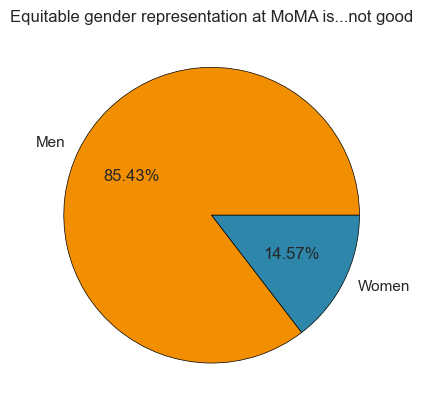

In [20]:
plt.pie(
    ps[['gender_male', 'gender_female']].sum(),
    autopct=lambda s: '{:.2f}%'.format(s),
    labels=['Men', 'Women'],
    wedgeprops=dict(edgecolor='black', linewidth=.5), labeldistance=1.1
)

plt.title('Equitable gender representation at MoMA is...not good');

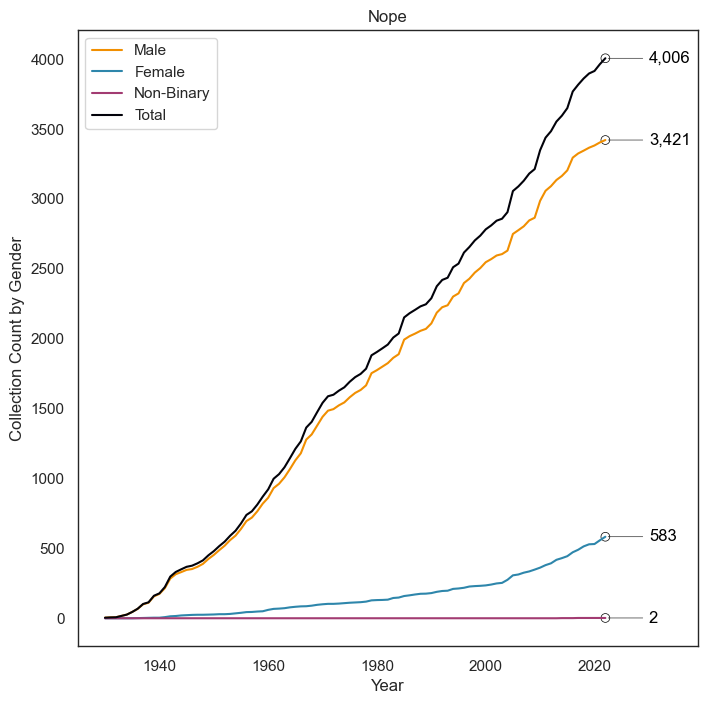

In [21]:
per_year_by_gender = ps.groupby(['year_acquired'])[['gender_male', 'gender_female', 'gender_nonbinary']].sum().cumsum()
per_year_by_gender['Total'] = per_year_by_gender.sum(axis=1)

per_year_by_gender.rename(
    columns={
        'gender_male':'Male', 
        'gender_female':'Female', 
        'gender_nonbinary':'Non-Binary'
    }, inplace=True
)

per_year_by_gender_long = per_year_by_gender.melt(ignore_index=False, var_name='Gender', value_name='Acquisitions per Year')

fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=per_year_by_gender_long.reset_index(),
    x='year_acquired',
    y='Acquisitions per Year',
    hue='Gender'
)


# Annotations
total_acquisitions = per_year_by_gender.iloc[-1].sum()
total_male, total_female, total_nonbinary, total = per_year_by_gender.iloc[-1]

sns.scatterplot(
    x = [2022, 2022, 2022, 2022],
    y = per_year_by_gender.iloc[-1],
    edgecolor='black',
    facecolor='none',
    s=40
)

ax.annotate(
    '{:,.0f}'.format(total_male), xy=(2022, total_male),
    xycoords='data', xytext=(2030, total_male), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:,.0f}'.format(total_female), xy=(2022, total_female),
    xycoords='data', xytext=(2030, total_female), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:,.0f}'.format(total_nonbinary), xy=(2022, total_nonbinary),
    xycoords='data', xytext=(2030, total_nonbinary), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:,.0f}'.format(total), xy=(2022, total),
    xycoords='data', xytext=(2030, total), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.legend(loc='upper left')
ax.set_xlim(1925, 2039)

ax.set_title('Nope')
ax.set_xlabel('Year')
ax.set_ylabel('Collection Count by Gender');

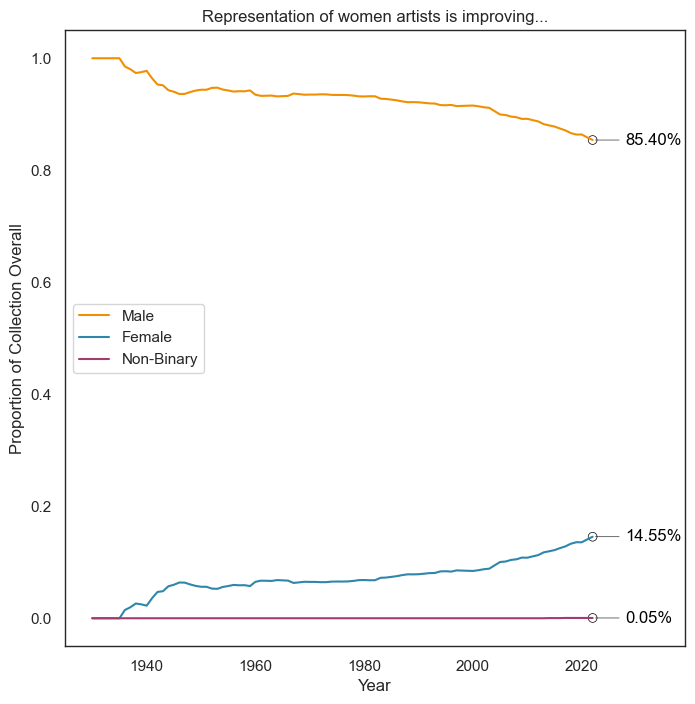

In [22]:
per_year_by_gender.drop(columns='Total', inplace=True)

per_year_by_gender_ratio = per_year_by_gender.div(per_year_by_gender.sum(axis=1), axis=0)

per_year_by_gender_ratio_long = per_year_by_gender_ratio.melt(ignore_index=False, var_name='Gender', value_name='Acquisitions per Year')

fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=per_year_by_gender_ratio_long.reset_index(),
    x='year_acquired',
    y='Acquisitions per Year',
    hue='Gender', 
)


# Annotations
total_acquisitions = per_year_by_gender.iloc[-1].sum()
total_male, total_female, total_nonbinary = per_year_by_gender.iloc[-1]

sns.scatterplot(
    x = [2022, 2022, 2022],
    y = per_year_by_gender.iloc[-1] / total_acquisitions,
    edgecolor='black',
    facecolor='none',
    s=40
)

ax.annotate(
    '{:.2f}%'.format(total_male / total_acquisitions * 100), xy=(2022, total_male/total_acquisitions),
    xycoords='data', xytext=(2028, total_male/total_acquisitions), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:.2f}%'.format(total_female / total_acquisitions * 100), xy=(2022, total_female/total_acquisitions),
    xycoords='data', xytext=(2028, total_female/total_acquisitions), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)

ax.annotate(
    '{:.2f}%'.format(total_nonbinary / total_acquisitions * 100), xy=(2022, total_nonbinary/total_acquisitions),
    xycoords='data', xytext=(2028, total_nonbinary/total_acquisitions), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='left', verticalalignment='center', color='black'
)


ax.legend(loc='center left')
ax.set_xlim(1925, 2039)

ax.set_title('Representation of women artists is improving...')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Collection Overall');

It's bad, folks. But this last chart holds a glimmer of hope: It shows us that work by women is making up a greater and greater proportion of the Dept's overall collection as time goes on. 14.5% is not great. Piss poor, actually. But, by the looks of things, it's mover than double the representation women had at the museum until as recently as 1990.

# Sadly, Reaching Gender Parity is a Long Ways Off
On average, the Dept. of Painting & Sculpture acquires 43 works per year. Can the department reach gender parity any time soon? What if it commits to acquiring 70% of works each year by women? 80%? 90%? *95%*?

In [23]:
print("On average, the Department of Painting & Sculpture acquired {:.0f} works per year"
      .format(ps.groupby('year_acquired')['Title'].count().mean()))

On average, the Department of Painting & Sculpture acquired 43 works per year


In [24]:
ps[ps['year_acquired'] > 2010].groupby('year_acquired')[['gender_male', 'gender_female']].sum()

,gender_male,gender_female
year_acquired,,
2011.0,72.0,18.0
2012.0,33.0,13.0
2013.0,44.0,25.0
2014.0,29.0,12.0
2015.0,40.0,14.0
2016.0,91.0,28.0
2017.0,30.0,18.0
2018.0,20.0,24.0
2019.0,21.0,15.0


In [25]:
import math

def compute_trend(allocation=.90, avg=43):
    '''
    Function to calculate trend lines until male/female parity
    '''
    
    years = [2022]
    projected_female = [583]
    projected_male = [3421]

    female_slope = math.ceil(allocation* avg)
    male_slope = avg - female_slope
    female_intercept = 583
    male_intercept = 3421
    
    while projected_female[-1] < projected_male[-1]:
        
        years.append(years[-1] + 1)
        projected_female.append((years[-1] - 2022) * female_slope + female_intercept)
        projected_male.append((years[-1] - 2022) * male_slope + male_intercept)
    
    return years, projected_male, projected_female

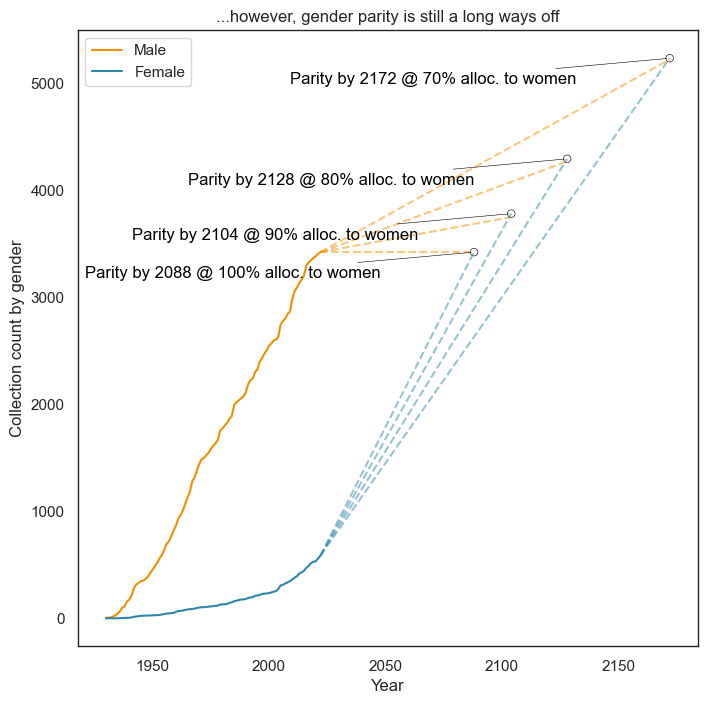

In [26]:
per_year_by_gender = ps.groupby(['year_acquired'])[['gender_male', 'gender_female']].sum().cumsum()

per_year_by_gender.rename(
    columns={
        'gender_male':'Male', 
        'gender_female':'Female', 
    }, inplace=True
)

per_year_by_gender_long = per_year_by_gender.melt(ignore_index=False, var_name='Gender', value_name='Acquisitions per Year')

fig, ax = plt.subplots(figsize=(8, 8))

sns.lineplot(
    data=per_year_by_gender_long.reset_index(),
    x='year_acquired',
    y='Acquisitions per Year',
    hue='Gender'
)

for allocation  in [.7, .8, .9, 1]:
    
    years, projected_male, projected_female = compute_trend(allocation=allocation)
    
    # Draw projection for male artists
    sns.lineplot(
        x=years,
        y=projected_male,
        alpha=.5,
        ls='--',
        color='#F18F01'
    )
    
    # Draw projection for female artists
    sns.lineplot(
        x=years,
        y=projected_female,
        color='#2E86AB',
        ls='--',
        alpha=.5
    )
    
    sns.scatterplot(
        x=[years[-1]],
        y=[projected_female[-1]],
        s=30,
        edgecolor='black',
        facecolor='none'
    )
    
    ax.annotate(
    'Parity by {} @ {:.0f}% alloc. to women'.format(years[-1], allocation * 100), 
    xy=(years[-1], projected_female[-1]),
    xycoords='data', xytext=(years[-1]-40, projected_female[-1]-200), 
    textcoords='data', arrowprops=dict(arrowstyle='-', color='black', lw=.4),
    horizontalalignment='right', verticalalignment='center', color='black'
)
    
ax.set_title('...however, gender parity is still a long ways off')
ax.set_xlabel('Year')
ax.set_ylabel('Collection count by gender');